In [149]:
# Datasetinde araba fiyatı ve araba max hız değerleri vardır.

In [151]:
import pandas as pd 
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv("polynomial_regression.csv", sep=";")

In [155]:
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [157]:
y = df.araba_max_hiz.values.reshape(-1,1)
x = df.araba_fiyat.values.reshape(-1,1)

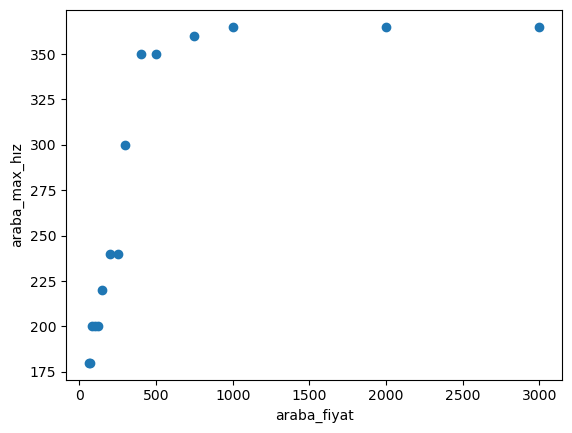

In [159]:
plt.scatter(x,y)
plt.xlabel("araba_fiyat")
plt.ylabel("araba_max_hız")
plt.show()

In [161]:
# linear regression =  y = b0 + b1*x
# multiple linear regression   y = b0 + b1*x1 + b2*x2

In [163]:
# linear regression  

In [165]:
x


array([[  60],
       [  70],
       [  80],
       [ 100],
       [ 120],
       [ 150],
       [ 200],
       [ 250],
       [ 300],
       [ 400],
       [ 500],
       [ 750],
       [1000],
       [2000],
       [3000]], dtype=int64)

In [167]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [169]:
lr.predict(x)

array([[240.10817425],
       [240.7435423 ],
       [241.37891035],
       [242.64964646],
       [243.92038256],
       [245.82648672],
       [249.00332698],
       [252.18016724],
       [255.3570075 ],
       [261.71068803],
       [268.06436855],
       [283.94856986],
       [299.83277117],
       [363.3695764 ],
       [426.90638163]])

In [171]:
y_head = lr.predict(x)

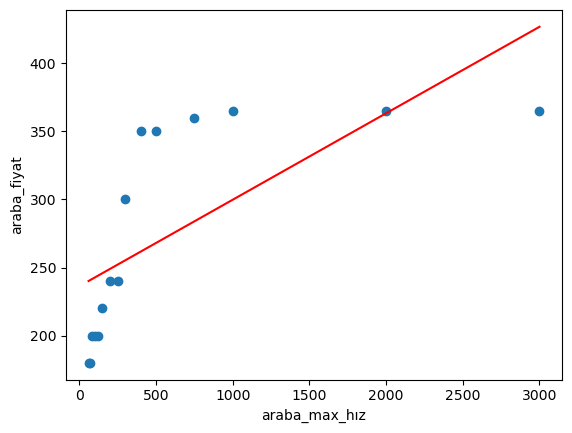

In [173]:
plt.scatter(x,y)
plt.plot(x,y_head,color="red",label ="linear")
plt.xlabel("araba_max_hız")
plt.ylabel("araba_fiyat")
plt.show()

In [175]:
# en iyi tahmin yapabilen model bu . İyi  tahmin olmadı lineer model bu veri setine çok da uygun değil.

In [177]:
lr.predict([[10000]]) # arabanın fiyatı 10 milyon olursa hızı 871 nerdeyse 
print("10 milyon tl lik araba hizi tahmini: ",lr.predict([[10000]]))

10 milyon tl lik araba hizi tahmini:  [[871.66401826]]


In [179]:
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n # polinom model lazım bu data için

![resim](3.jpg)

In [182]:
# polinomluk x'in derecesinin artması ile oluşur.
# degree : n

In [184]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree=2) 


In [186]:
x_polynomial = polynomial_regression.fit_transform(x)   # 2.derecedene çevir ve uygula

In [188]:
x_polynomial  # x^0 , x^1 , x^2

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 3.000e+03, 9.000e+06]])

In [190]:
linear_regression2 = LinearRegression()

In [192]:
linear_regression2.fit(x_polynomial,y) # araba hızımızı (y'yi) oluşturduğumuz x_polynomiali de kullanarak fit ediyoruz.

LinearRegression()

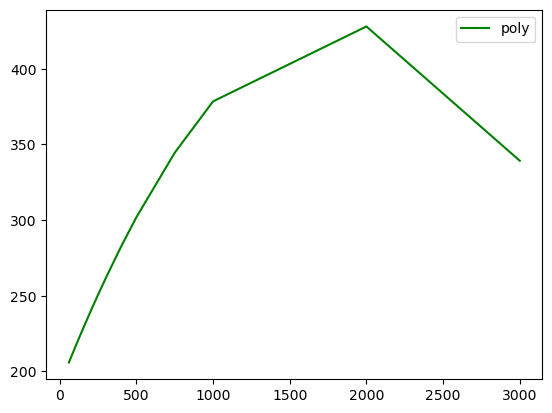

In [194]:
y_head2 =  linear_regression2.predict(x_polynomial)
plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()

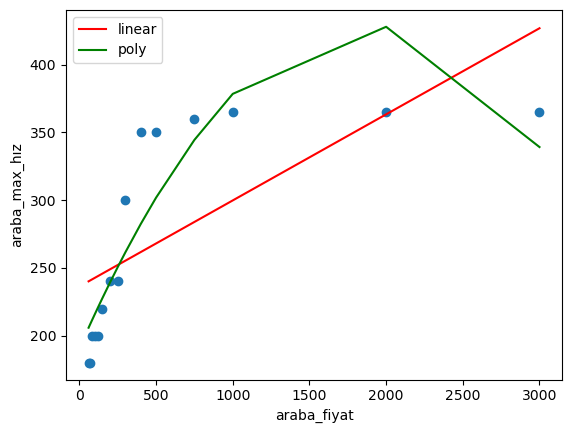

In [196]:
plt.scatter(x,y)
plt.plot(x,y_head,color="red",label ="linear")
plt.xlabel("araba_fiyat")
plt.ylabel("araba_max_hız")
y_head2 =  linear_regression2.predict(x_polynomial)
plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()

* Linear modelden daha iyi bir şekilde fit etti .
* Burdaki n değeri ya da degree ile oynayarak daha da iyileştirebilirim.